In [48]:
import numpy as np
from matplotlib import pyplot as plt

n = 6

time = np.array([
      np.array([
       np.array([4.45, 5.05, 5.23]),
       np.array([3.5, 3.21, 3.68]),
       np.array([2.8, 2.92, 2.84]),
       np.array([2.49, 2.56, 2.32])
      ]),
      np.array([
       np.array([5.08, 5.11, 5.36]),
       np.array([3.84, 3.93, 4.11]),
       np.array([3.03, 3.02, 2.92]),
       np.array([2.58, 2.66, 2.55])
      ]),
      np.array([
       np.array([6.28, 6.59, 6.54]),
       np.array([4.9, 4.76, 4.84]),
       np.array([3.82, 3.93, 3.71]),
       np.array([3.27, 3.36, 3.23])
      ]),
      np.array([
       np.array([7.36, 7.53, 7.63]),
       np.array([5.34, 5.36, 5.26]),
       np.array([4.34, 4.51, 4.82]),
       np.array([3.72, 3.65, 3.82])
      ]),
      np.array([
       np.array([8.29, 8.13, 7.86]),
       np.array([5.86, 5.96, 6.12]),
       np.array([4.89, 4.98, 4.93]),
       np.array([4.37, 4.26, 4.32])
      ]),
      np.array([
       np.array([10.02, 9.75, 9.45]),
       np.array([6.82, 6.92, 7.01]),
       np.array([5.7, 5.36, 5.76]),
       np.array([4.98, 4.92, 4.89])
      ])
])

h = 0.7
d = 0.046

m_c = 0.047
m_b = 0.22
g = 9.81

In [49]:
t_average = np.array([[np.average(x) for x in y] for y in time])
t_average

array([[4.91      , 3.46333333, 2.85333333, 2.45666667],
       [5.18333333, 3.96      , 2.99      , 2.59666667],
       [6.47      , 4.83333333, 3.82      , 3.28666667],
       [7.50666667, 5.32      , 4.55666667, 3.73      ],
       [8.09333333, 5.98      , 4.93333333, 4.31666667],
       [9.74      , 6.91666667, 5.60666667, 4.93      ]])

In [50]:
t_std = np.array([[np.std(x) * (2 ** 0.5) * 4.30 for x in y] for y in time])
t_std

array([[2.02785009, 1.17742903, 0.30337948, 0.61282334],
       [0.76330888, 0.68260384, 0.30202207, 0.28233392],
       [0.82637602, 0.34874505, 0.54617335, 0.33060013],
       [0.67777118, 0.26273434, 1.20842836, 0.42422793],
       [1.07910107, 0.65118149, 0.22389382, 0.27346257],
       [1.41573868, 0.47191289, 1.07107506, 0.22753461]])

In [51]:
a = np.array([2 * h / x ** 2 for x in t_average])
a


array([[0.05807177, 0.11671843, 0.17195825, 0.231972  ],
       [0.05210864, 0.0892766 , 0.1565978 , 0.20763264],
       [0.0334441 , 0.05992866, 0.09594035, 0.1296035 ],
       [0.0248447 , 0.04946577, 0.06742695, 0.10062604],
       [0.02137338, 0.03914945, 0.05752374, 0.07513305],
       [0.01475741, 0.02926404, 0.04453675, 0.05760155]])

In [52]:
a_error = np.array([[
                    (
                        (h / (t_average[i][j] ** 3) * t_std[i][j]) ** 2 + 
                        (2 / t_average[i][j] ** 2 * 0.0005 * 2 / 3) ** 2
                    ) ** 0.5
                   for j in range(4)] for i in range(6)])
a_error

array([[0.01199197, 0.01984045, 0.00914206, 0.02893329],
       [0.0038369 , 0.00769463, 0.00790938, 0.01128832],
       [0.00213587, 0.00216224, 0.0068588 , 0.00651859],
       [0.00112167, 0.00122169, 0.00894087, 0.0057225 ],
       [0.00142491, 0.00213164, 0.00130561, 0.00238012],
       [0.00107254, 0.00099842, 0.00425411, 0.00132953]])

In [53]:
e = np.array([[2 * x / d for x in y] for y in a])
e

array([[ 2.5248595 ,  5.0747145 ,  7.47644564, 10.08573919],
       [ 2.26559315,  3.8815915 ,  6.80860004,  9.02750617],
       [ 1.45409117,  2.60559375,  4.17131967,  5.63493459],
       [ 1.08020439,  2.15068564,  2.93160653,  4.37504512],
       [ 0.92927733,  1.70215001,  2.50103217,  3.26665427],
       [ 0.64162649,  1.27234974,  1.93638061,  2.50441537]])

In [54]:
e_error = np.array([[
                    (
                        (2 / d * a_error[i][j]) ** 2 + 
                        (2 * a[i][j] / d ** 2 * 0.0005 * 2 / 3) ** 2
                     ) ** 0.5
                   for j in range(4)] for i in range(6)])
e_error

array([[0.52171095, 0.86341189, 0.40115615, 1.26009033],
       [0.16762745, 0.33572954, 0.34740734, 0.49513675],
       [0.09345983, 0.09588769, 0.29973668, 0.28634323],
       [0.04939232, 0.05535602, 0.38931367, 0.25081619],
       [0.06231772, 0.09349702, 0.05958868, 0.10615647],
       [0.0468634 , 0.04437773, 0.18549296, 0.06058735]])

In [55]:
M = np.array([[(m_c + m_b * (1 + i)) * d / 2 * (g - elem) for i, elem in enumerate(x)] for x in a])
M

array([[0.05988659, 0.10857445, 0.1567242 , 0.20421313],
       [0.05992321, 0.10888182, 0.15697397, 0.20473207],
       [0.06003783, 0.10921055, 0.15796032, 0.20639573],
       [0.06009064, 0.10932774, 0.15842398, 0.20701356],
       [0.06011196, 0.1094433 , 0.15858502, 0.2075571 ],
       [0.06015258, 0.10955402, 0.1587962 , 0.20793089]])

In [56]:
M_error = np.array([[
                    (
                        (((m_c + m_b * (1 + i))) * d / 2 * a_error[i][j]) ** 2 + 
                        ( (m_c + m_b * (1 + i)) * (g - a[i][j]) / 2 * 0.0005 * 2 / 3) ** 2
                     ) ** 0.5
                   for j in range(4)] for i in range(6)])
M_error

array([[0.00044017, 0.00044823, 0.00043255, 0.00046177],
       [0.00079318, 0.00079369, 0.00078853, 0.00078958],
       [0.00115253, 0.00114942, 0.00115006, 0.00114559],
       [0.001512  , 0.00150823, 0.00151725, 0.00150505],
       [0.00187164, 0.00186871, 0.00186467, 0.00186204],
       [0.00223194, 0.0022286 , 0.00222891, 0.00222231]])

In [71]:
from scipy.optimize import leastsq

def f(params, x, y):
  return y - (params[1] + params[0] * x)


I = [int() for _ in range(n)]
M_tr = [int() for _ in range(n)]
for i in range(n):
  params = [0, 0]
  result = leastsq(f, params, (e[i], M[i]))
  I[i] = result[0][0]
  M_tr[i] = result[0][1]

I = np.array(I)
M_tr = np.array(M_tr)
I, M_tr

(array([0.01917542, 0.02055326, 0.03444069, 0.04527879, 0.06291735,
        0.07871085]),
 array([0.0117278 , 0.01967072, 0.01401297, 0.01443221, 0.00181184,
        0.00906104]))

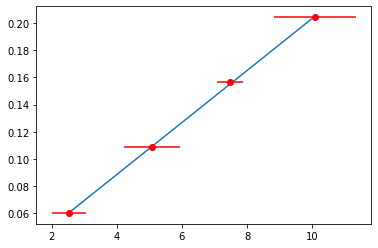

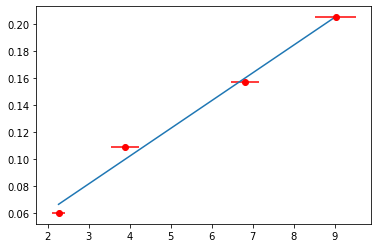

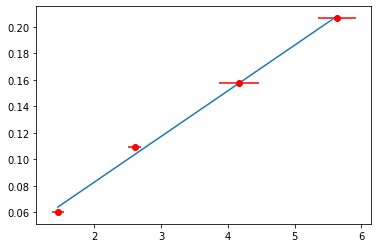

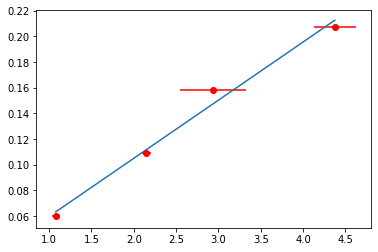

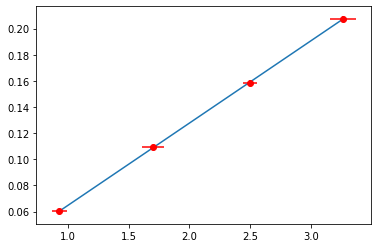

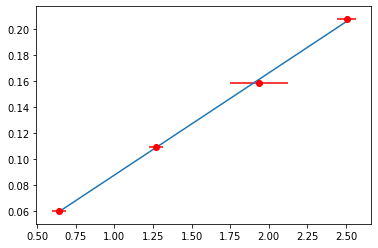

In [58]:

for i in range(n):
  plt.errorbar(e[i], M[i], xerr=e_error[i], yerr=M_error[i], fmt='o', color='r')
  plt.plot(e[i], I[i] * e[i] + M_tr[i])
  plt.show()

In [63]:
l = 0.057
l0 = 0.025
b = 0.040

R2 = np.array([l + i * l0 + 0.5 * b for i in range(n)]) ** 2
R2

array([0.005929, 0.010404, 0.016129, 0.023104, 0.031329, 0.040804])

In [60]:
result = leastsq(f, [0, 0], (R2, I))
I0, my = result[0][1], result[0][0]
print(I0, my)

0.005283609231566106 1.7962137417325887


In [82]:
d = f([my, I0], R2, I)
print(d)

D = np.sum((R2 - np.average(R2)) ** 2)
print(D)

[ 0.00324206 -0.00341816  0.00018595 -0.00150455  0.00136016  0.00013454]
0.0008659692708333329


In [85]:
I0_error = (1 / 6 + np.average(I) ** 2 / D) * np.sum(d ** 2) / 4 * 2.57
I0_error

3.9853985987699635e-05

In [86]:
my_error =  (np.average(I) ** 2 / D) * np.sum(d ** 2) / 4 * 2.57
my_error

3.7031148747797315e-05

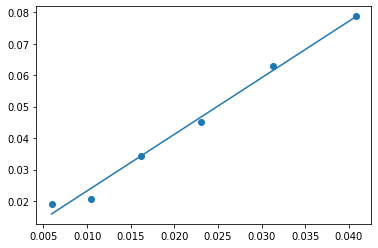

In [61]:
plt.plot(R2, I0 + my * R2)
plt.scatter(R2, I, marker='o')